In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in dataset workbook (multiple captures have been combined into one notebook prior to processing)

all_sheets = pd.read_excel('Combination.xlsx', sheet_name=None)

In [4]:
all_sheets

{'Friday-WorkingHours-Afternoon-D':          Destination Port   Flow Duration   Total Fwd Packets  \
 0                   54865               3                   2   
 1                   55054             109                   1   
 2                   55055              52                   1   
 3                   46236              34                   1   
 4                   54863               3                   2   
 ...                   ...             ...                 ...   
 225740              61374              61                   1   
 225741              61378              72                   1   
 225742              61375              75                   1   
 225743              61323              48                   2   
 225744              61326              68                   1   
 
          Total Backward Packets  Total Length of Fwd Packets  \
 0                             0                           12   
 1                             1         

In [5]:
# Combine into one dataframe

comb_data = pd.concat(all_sheets)

In [6]:
# Remove whitespace from column names
comb_data.columns = comb_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
comb_data.head()

c:\users\mores\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


destination_port  flow_duration  \
Friday-WorkingHours-Afternoon-D 0             54865              3   
                                1             55054            109   
                                2             55055             52   
                                3             46236             34   
                                4             54863              3   

                                   total_fwd_packets  total_backward_packets  \
Friday-WorkingHours-Afternoon-D 0                  2                       0   
                                1                  1                       1   
                                2                  1                       1   
                                3                  1                       1   
                                4                  2                       0   

                                   total_length_of_fwd_packets  \
Friday-WorkingHours-Afternoon-D 0                           12   
                                1                            6   
                                2                            6   
                                3                            6   
                                4                           12   

                                   total_length_of_bwd_packets  \
Friday-WorkingHours-Afternoon-D 0                            0   
                                1                            6   
                                2                            6   
                                3                            6   
                                4                            0   

                                   fwd_packet_length_max  \
Friday-WorkingHours-Afternoon-D 0                      6   
                                1                      6   
                                2                      6   
                                3                      6   
                                4                      6   

                                   fwd_packet_length_min  \
Friday-WorkingHours-Afternoon-D 0                      6   
                                1                      6   
                                2                      6   
                                3                      6   
                                4                      6   

                                   fwd_packet_length_mean  \
Friday-WorkingHours-Afternoon-D 0                     6.0   
                                1                     6.0   
                                2                     6.0   
                                3                     6.0   
                                4                     6.0   

                                   fwd_packet_length_std  ...  \
Friday-WorkingHours-Afternoon-D 0                    0.0  ...   
                                1                    0.0  ...   
                                2                    0.0  ...   
                                3                    0.0  ...   
                                4                    0.0  ...   

                                   min_seg_size_forward  active_mean  \
Friday-WorkingHours-Afternoon-D 0                    20          0.0   
                                1                    20          0.0   
                                2                    20          0.0   
                                3                    20          0.0   
                                4                    20          0.0   

                                   active_std  active_max  active_min  \
Friday-WorkingHours-Afternoon-D 0         0.0           0           0   
                                1         0.0           0           0   
                                2         0.0           0           0   
                                3         0.0           0           0   
                                4         0.0           0    

In [7]:
comb_data

destination_port  flow_duration  \
Friday-WorkingHours-Afternoon-D 0                  54865              3   
                                1                  55054            109   
                                2                  55055             52   
                                3                  46236             34   
                                4                  54863              3   
...                                                  ...            ...   
Wednesday-workingHours.pcap_ISC 692698                53          32215   
                                692699                53            324   
                                692700             58030             82   
                                692701                53        1048635   
                                692702                53          94939   

                                        total_fwd_packets  \
Friday-WorkingHours-Afternoon-D 0                       2   
                                1                       1   
                                2                       1   
                                3                       1   
                                4                       2   
...                                                   ...   
Wednesday-workingHours.pcap_ISC 692698                  4   
                                692699                  2   
                                692700                  2   
                                692701                  6   
                                692702                  4   

                                        total_backward_packets  \
Friday-WorkingHours-Afternoon-D 0                            0   
                                1                            1   
                                2                            1   
                                3                            1   
                                4                            0   
...                                                        ...   
Wednesday-workingHours.pcap_ISC 692698                       2   
                                692699                       2   
                                692700                       1   
                                692701                       2   
                                692702                       2   

                                        total_length_of_fwd_packets  \
Friday-WorkingHours-Afternoon-D 0                                12   
                                1                                 6   
                                2                                 6   
                                3                                 6   
                                4                                12   
...                                                             ...   
Wednesday-workingHours.pcap_ISC 692698                          112   
                                692699                           84   
                                692700                           31   
                                692701                          192   
                                692702                          188   

                                        total_length_of_bwd_packets  \
Friday-WorkingHours-Afternoon-D 0                                 0   
                                1                                 6   
                                2                                 6   
                                3                                 6   
                                4                                 0   
...                                                             ...   
Wednesday-workingHours.pcap_ISC 692698                          152   
                                692699                          362   
                                692700                            6   
                                692701            

In [8]:
# List the amount of records each label has

comb_data['label'].value_counts()

BENIGN                          2273097
DoS Hulk                         231073
PortScan                         158930
DDoS                             128027
DoS GoldenEye                     10293
FTP-Patator                        7938
SSH-Patator                        5897
DoS slowloris                      5796
DoS Slowhttptest                   5499
Bot                                1966
Web Attack ï¿½ Brute Force         1507
Web Attack ï¿½ XSS                  652
Infiltration                         36
Web Attack ï¿½ Sql Injection         21
Heartbleed                           11
Name: label, dtype: int64

In [9]:
# comb_data['label'].unique()

In [10]:
# Get rid of attacks and their data which have less than 1000 records and save to another dataframe

attacks = comb_data.drop(comb_data.loc[comb_data['label'] == 'Web Attack ï¿½ XSS'].index)
attacks.drop(attacks.loc[attacks['label'] == 'Infiltration'].index, inplace=True) 
attacks.drop(attacks.loc[attacks['label'] == 'Web Attack ï¿½ Sql Injection'].index, inplace=True)
attacks.drop(attacks.loc[attacks['label'] == 'Heartbleed'].index, inplace=True)

# Fix label name

attacks.loc[(attacks['label'] == 'Web Attack ï¿½ Brute Force'), 'label'] = 'Web Attack Brute Force'


In [11]:
attacks['label'].value_counts()

BENIGN                    2273097
DoS Hulk                   231073
PortScan                   158930
DDoS                       128027
DoS GoldenEye               10293
FTP-Patator                  7938
SSH-Patator                  5897
DoS slowloris                5796
DoS Slowhttptest             5499
Bot                          1966
Web Attack Brute Force       1507
Name: label, dtype: int64

In [12]:
# str_labels = attacks['label'].unique()

In [13]:
attacks

destination_port  flow_duration  \
Friday-WorkingHours-Afternoon-D 0                  54865              3   
                                1                  55054            109   
                                2                  55055             52   
                                3                  46236             34   
                                4                  54863              3   
...                                                  ...            ...   
Wednesday-workingHours.pcap_ISC 692698                53          32215   
                                692699                53            324   
                                692700             58030             82   
                                692701                53        1048635   
                                692702                53          94939   

                                        total_fwd_packets  \
Friday-WorkingHours-Afternoon-D 0                       2   
                                1                       1   
                                2                       1   
                                3                       1   
                                4                       2   
...                                                   ...   
Wednesday-workingHours.pcap_ISC 692698                  4   
                                692699                  2   
                                692700                  2   
                                692701                  6   
                                692702                  4   

                                        total_backward_packets  \
Friday-WorkingHours-Afternoon-D 0                            0   
                                1                            1   
                                2                            1   
                                3                            1   
                                4                            0   
...                                                        ...   
Wednesday-workingHours.pcap_ISC 692698                       2   
                                692699                       2   
                                692700                       1   
                                692701                       2   
                                692702                       2   

                                        total_length_of_fwd_packets  \
Friday-WorkingHours-Afternoon-D 0                                12   
                                1                                 6   
                                2                                 6   
                                3                                 6   
                                4                                12   
...                                                             ...   
Wednesday-workingHours.pcap_ISC 692698                          112   
                                692699                           84   
                                692700                           31   
                                692701                          192   
                                692702                          188   

                                        total_length_of_bwd_packets  \
Friday-WorkingHours-Afternoon-D 0                                 0   
                                1                                 6   
                                2                                 6   
                                3                                 6   
                                4                                 0   
...                                                             ...   
Wednesday-workingHours.pcap_ISC 692698                          152   
                                692699                          362   
                                692700                            6   
                                692701            

<AxesSubplot:>

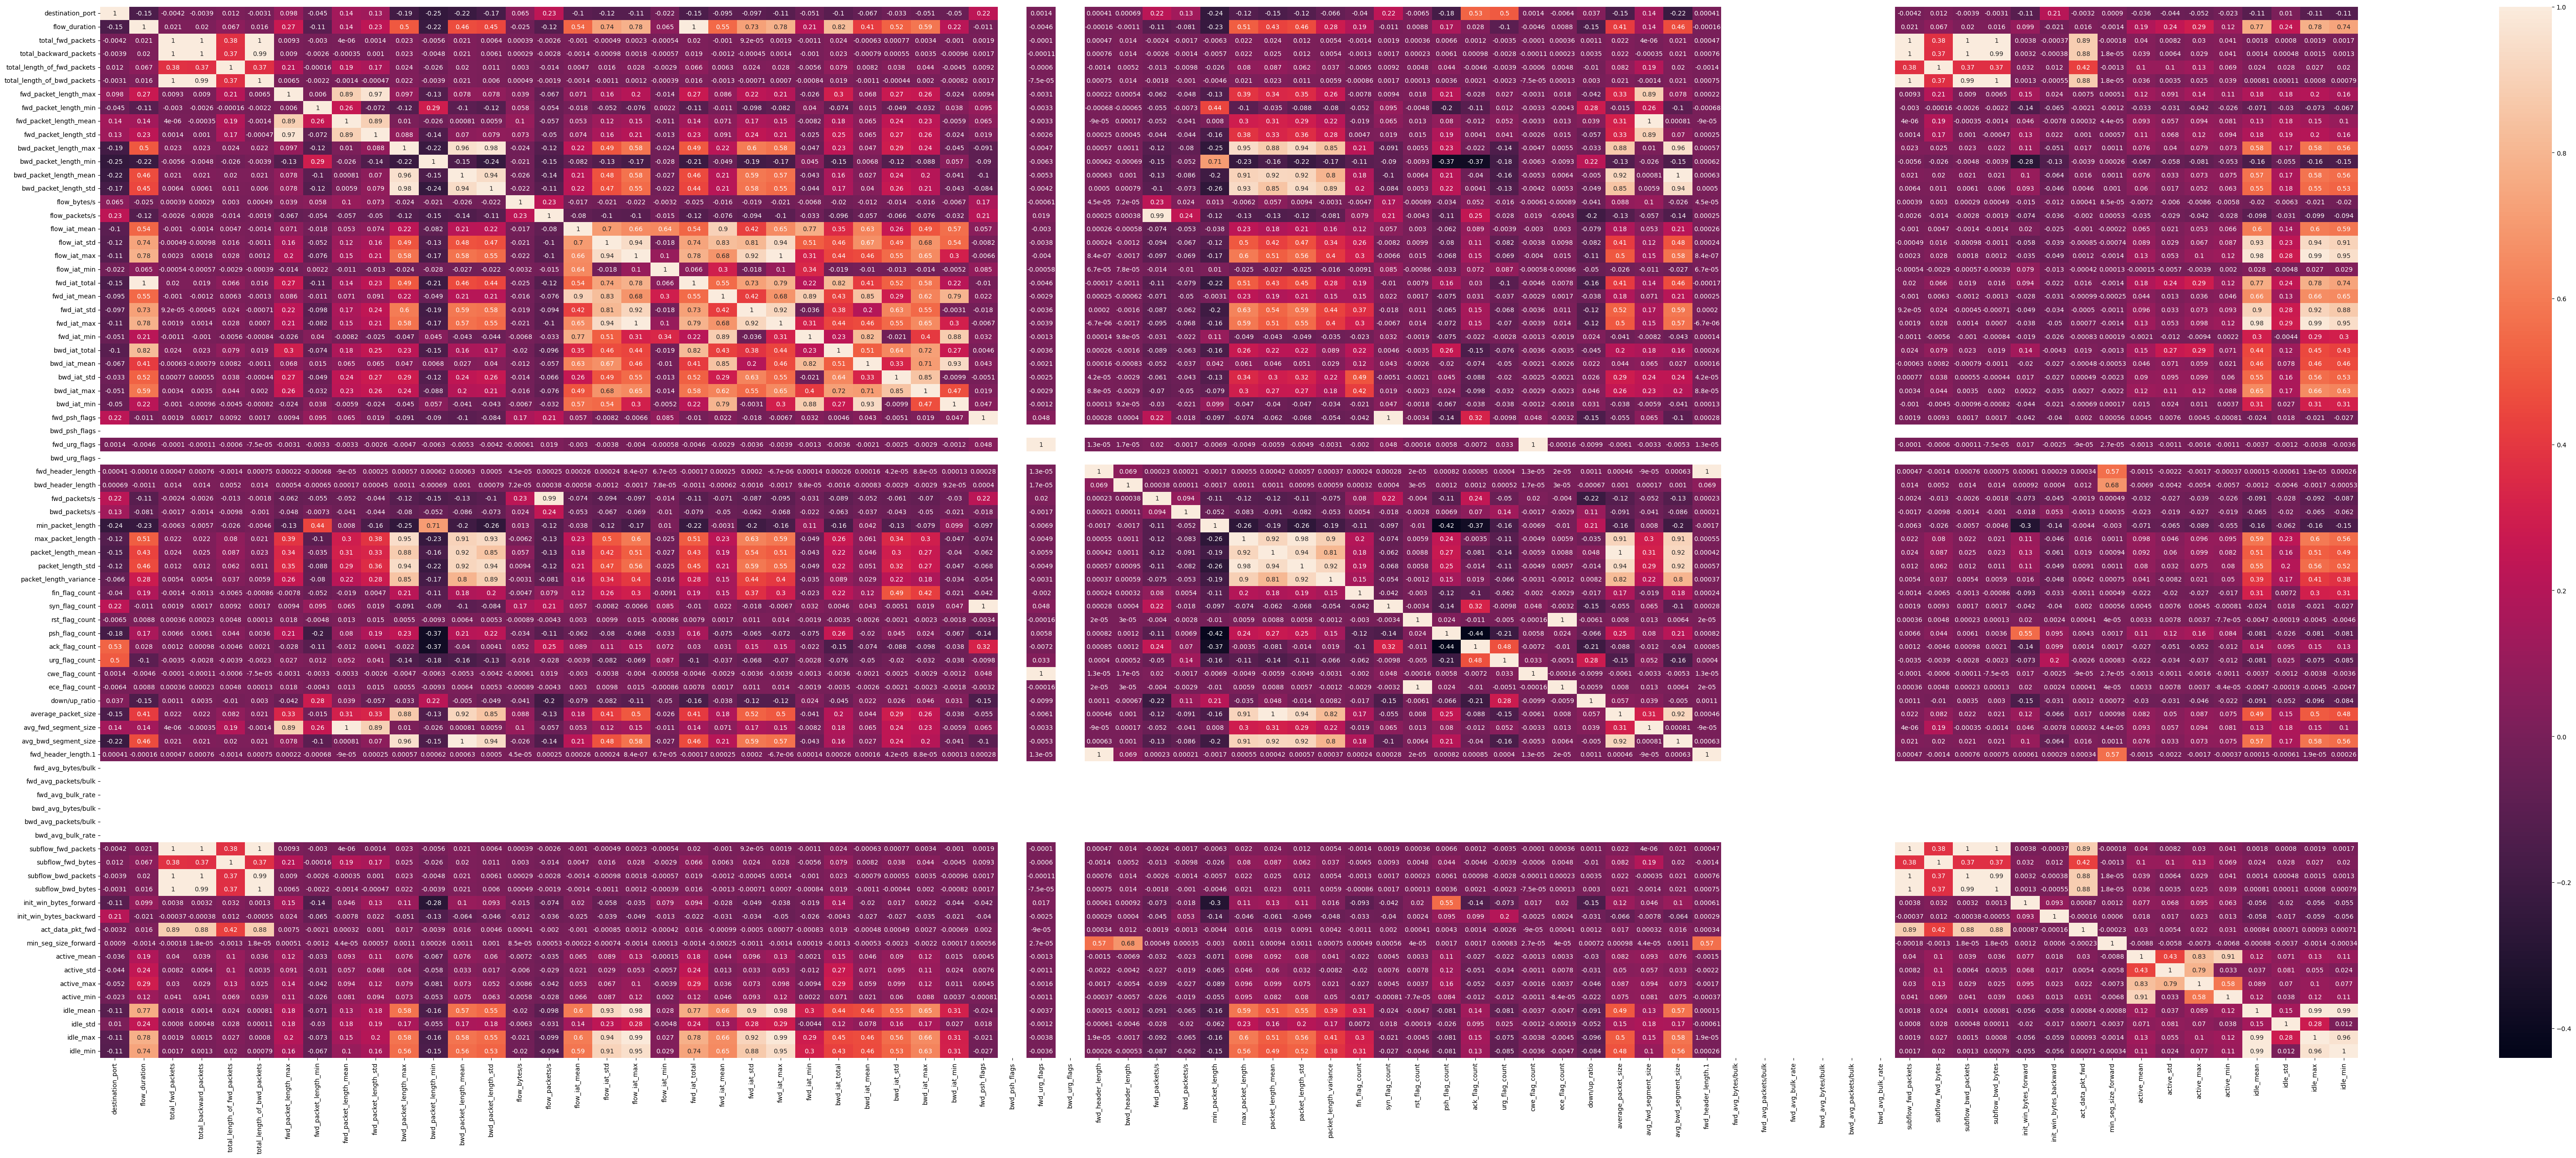

In [14]:
plt.figure(figsize = (80, 30))
sns.heatmap(attacks.corr(), annot = True)

In [15]:
attacks.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

In [16]:
# Remove columns that show blank due to too low occurances
attacks = attacks.drop(columns=['bwd_psh_flags', 'bwd_urg_flags', 'fwd_avg_bytes/bulk', 'fwd_avg_packets/bulk', 'fwd_avg_bulk_rate', 'bwd_avg_bytes/bulk', 'bwd_avg_packets/bulk', 'bwd_avg_bulk_rate'])

# Remove redundant column which appears twice
attacks = attacks.drop(columns=['fwd_header_length.1'])

<AxesSubplot:>

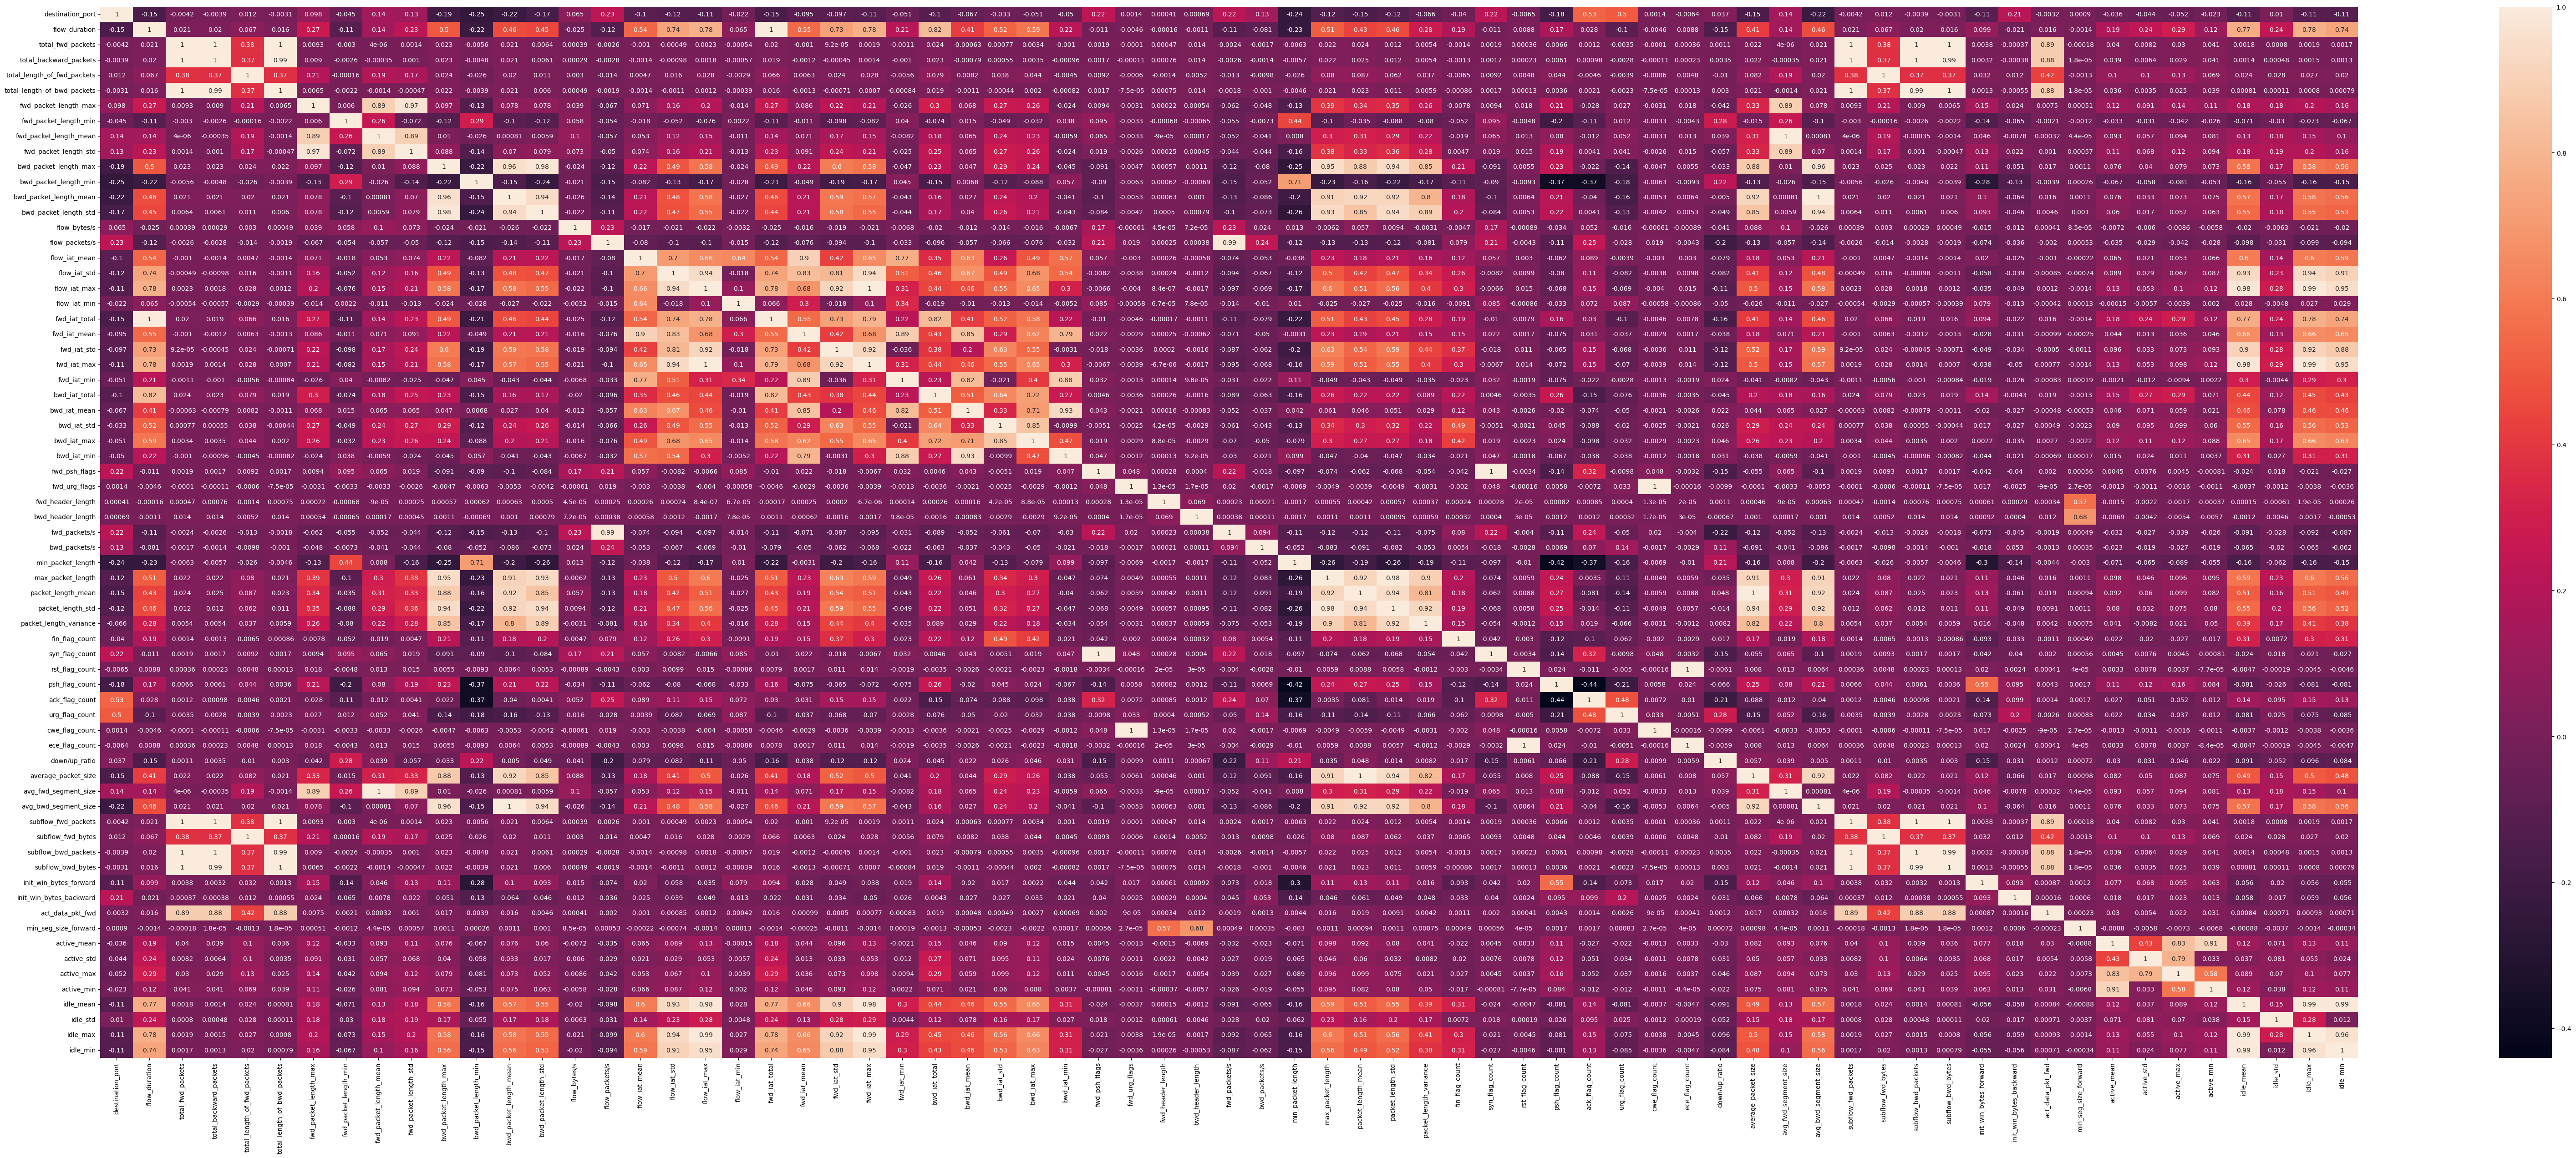

In [17]:
plt.figure(figsize = (80, 30))
sns.heatmap(attacks.corr(), annot = True)

In [18]:
attacks.dtypes

destination_port                 int64
flow_duration                    int64
total_fwd_packets                int64
total_backward_packets           int64
total_length_of_fwd_packets      int64
                                ...   
idle_mean                      float64
idle_std                       float64
idle_max                         int64
idle_min                         int64
label                           object
Length: 70, dtype: object

In [19]:
# attacks['Idle Mean'] = attacks['Idle Mean'].astype('int')
# attacks[' Idle Std'] = attacks[' Idle Std'].astype('int')

In [20]:
# # Convert from float to int

# for c in attacks.columns:
#     print(c)
#     if attacks[c].dtype == np.float64:
#         try:
#             attacks[c] = attacks[c].astype('int')
#         except:
#             print('FAILURE TO CONVERT: ', attacks[c].dtype)

# attacks.dtypes
    

In [21]:
attacks

destination_port  flow_duration  \
Friday-WorkingHours-Afternoon-D 0                  54865              3   
                                1                  55054            109   
                                2                  55055             52   
                                3                  46236             34   
                                4                  54863              3   
...                                                  ...            ...   
Wednesday-workingHours.pcap_ISC 692698                53          32215   
                                692699                53            324   
                                692700             58030             82   
                                692701                53        1048635   
                                692702                53          94939   

                                        total_fwd_packets  \
Friday-WorkingHours-Afternoon-D 0                       2   
                                1                       1   
                                2                       1   
                                3                       1   
                                4                       2   
...                                                   ...   
Wednesday-workingHours.pcap_ISC 692698                  4   
                                692699                  2   
                                692700                  2   
                                692701                  6   
                                692702                  4   

                                        total_backward_packets  \
Friday-WorkingHours-Afternoon-D 0                            0   
                                1                            1   
                                2                            1   
                                3                            1   
                                4                            0   
...                                                        ...   
Wednesday-workingHours.pcap_ISC 692698                       2   
                                692699                       2   
                                692700                       1   
                                692701                       2   
                                692702                       2   

                                        total_length_of_fwd_packets  \
Friday-WorkingHours-Afternoon-D 0                                12   
                                1                                 6   
                                2                                 6   
                                3                                 6   
                                4                                12   
...                                                             ...   
Wednesday-workingHours.pcap_ISC 692698                          112   
                                692699                           84   
                                692700                           31   
                                692701                          192   
                                692702                          188   

                                        total_length_of_bwd_packets  \
Friday-WorkingHours-Afternoon-D 0                                 0   
                                1                                 6   
                                2                                 6   
                                3                                 6   
                                4                                 0   
...                                                             ...   
Wednesday-workingHours.pcap_ISC 692698                          152   
                                692699                          362   
                                692700                            6   
                                692701            

In [22]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

In [23]:
attacks_cleaned = attacks.copy()
attacks_cleaned = clean_dataset(attacks_cleaned) # see methods at top of notebook
attacks_cleaned

destination_port  flow_duration  \
Friday-WorkingHours-Afternoon-D 0                  54865              3   
                                1                  55054            109   
                                2                  55055             52   
                                3                  46236             34   
                                4                  54863              3   
...                                                  ...            ...   
Wednesday-workingHours.pcap_ISC 692698                53          32215   
                                692699                53            324   
                                692700             58030             82   
                                692701                53        1048635   
                                692702                53          94939   

                                        total_fwd_packets  \
Friday-WorkingHours-Afternoon-D 0                       2   
                                1                       1   
                                2                       1   
                                3                       1   
                                4                       2   
...                                                   ...   
Wednesday-workingHours.pcap_ISC 692698                  4   
                                692699                  2   
                                692700                  2   
                                692701                  6   
                                692702                  4   

                                        total_backward_packets  \
Friday-WorkingHours-Afternoon-D 0                            0   
                                1                            1   
                                2                            1   
                                3                            1   
                                4                            0   
...                                                        ...   
Wednesday-workingHours.pcap_ISC 692698                       2   
                                692699                       2   
                                692700                       1   
                                692701                       2   
                                692702                       2   

                                        total_length_of_fwd_packets  \
Friday-WorkingHours-Afternoon-D 0                                12   
                                1                                 6   
                                2                                 6   
                                3                                 6   
                                4                                12   
...                                                             ...   
Wednesday-workingHours.pcap_ISC 692698                          112   
                                692699                           84   
                                692700                           31   
                                692701                          192   
                                692702                          188   

                                        total_length_of_bwd_packets  \
Friday-WorkingHours-Afternoon-D 0                                 0   
                                1                                 6   
                                2                                 6   
                                3                                 6   
                                4                                 0   
...                                                             ...   
Wednesday-workingHours.pcap_ISC 692698                          152   
                                692699                          362   
                                692700                            6   
                                692701            

In [24]:
attacks_cleaned = attacks_cleaned.reset_index()
#attacks_cleaned.columns

# Remove index column added by reset_index method and sheet name column
try:
    attacks_cleaned.drop(columns=['index', 'level_0'], inplace=True)
except:
    attacks_cleaned.drop(columns=['level_0', 'level_1'], inplace=True)
#attacks_cleaned.drop(columns=['level_1'], inplace=True)
attacks_cleaned

destination_port  flow_duration  total_fwd_packets  \
0                   54865              3                  2   
1                   55054            109                  1   
2                   55055             52                  1   
3                   46236             34                  1   
4                   54863              3                  2   
...                   ...            ...                ...   
2827151                53          32215                  4   
2827152                53            324                  2   
2827153             58030             82                  2   
2827154                53        1048635                  6   
2827155                53          94939                  4   

         total_backward_packets  total_length_of_fwd_packets  \
0                             0                           12   
1                             1                            6   
2                             1                            6   
3                             1                            6   
4                             0                           12   
...                         ...                          ...   
2827151                       2                          112   
2827152                       2                           84   
2827153                       1                           31   
2827154                       2                          192   
2827155                       2                          188   

         total_length_of_bwd_packets  fwd_packet_length_max  \
0                                  0                      6   
1                                  6                      6   
2                                  6                      6   
3                                  6                      6   
4                                  0                      6   
...                              ...                    ...   
2827151                          152                     28   
2827152                          362                     42   
2827153                            6                     31   
2827154                          256                     32   
2827155                          226                     47   

         fwd_packet_length_min  fwd_packet_length_mean  fwd_packet_length_std  \
0                            6                     6.0                0.00000   
1                            6                     6.0                0.00000   
2                            6                     6.0                0.00000   
3                            6                     6.0                0.00000   
4                            6                     6.0                0.00000   
...                        ...                     ...                    ...   
2827151                     28                    28.0                0.00000   
2827152                     42                    42.0                0.00000   
2827153                      0                    15.5               21.92031   
2827154                     32                    32.0                0.00000   
2827155                     47                    47.0                0.00000   

         ...  min_seg_size_forward  active_mean  active_std  active_max  \
0        ...                    20          0.0         0.0           0   
1        ...                    20          0.0         0.0           0   
2        ...                    20          0.0         0.0           0   
3        ...                    20          0.0         0.0           0   
4        ...                    20          0.0         0.0           0   
...      ...                   ...          ...         ...         ...   
2827151  ...                    20          0.0         0.0           0   
2827152  ...                    20          0.0         0.0           0   
2827153  ...                    32          0.0         0.0           0   
282

In [25]:
#attacks_cleaned

In [26]:
# Save as new csv file

# path = ''
# os.chdir(path)

attacks_cleaned.to_csv('clean_data.csv')